In [1]:
from collections import defaultdict
import re

In [2]:
with open('i.txt') as file:
    lines = file.read().split('\n')

In [3]:
def pad(s): return '0'*(36-len(s)) + s

In [4]:
mem = defaultdict()
for line in lines:
    if line.startswith('mask'):
        mask = line.split('=')[1].strip()
        mask_0 = int(mask.replace('X', '0'), 2)
        mask_1 = int(mask.replace('X', '1'), 2)
    else:
        address = int(line.split('[')[1].split(']')[0])
        number = int(line.split('=')[1])
        mem[address] = (number & mask_1) | mask_0

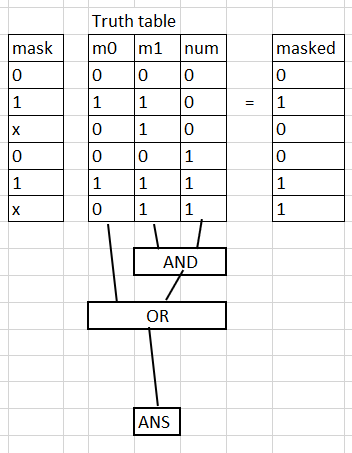

In [5]:
# q1
sum(mem.values())

14862056079561

In [6]:
def pad(s): return '0'*(36-len(s)) + s

def generate(masked_address, i):
    if i >= len(x_positions): 
        mem[int(masked_address,2)] = number
        return
    generate(masked_address[:len(masked_address)-1-x_positions[i]] + '0' + masked_address[len(masked_address)-x_positions[i]:], i+1)
    generate(masked_address[:len(masked_address)-1-x_positions[i]] + '1' + masked_address[len(masked_address)-x_positions[i]:], i+1)

In [7]:
mem = defaultdict()
for line in lines:
    if line.startswith('mask'):
        mask = line.split('=')[1].strip()
        mask_0 = int(re.sub('[X]', '0', mask), 2) # convert X to either 0 or 1 for bitwise operation for other digit
        x_positions = [i for i, m in enumerate(reversed(mask)) if m == 'X']  
    else:
        address = int(line.split('[')[1].split(']')[0])
        number = int(line.split('=')[1])
        masked_address = pad(bin(address | mask_0)[2:])             
        generate(masked_address, 0)

In [8]:
# q2
sum(mem.values())

3296185383161